# Homework w03d01

This exercise involves the Auto data set in the attached file also obtainable with additional information from  https://archive.ics.uci.edu/ml/datasets/Auto+MPG. 
1. Make sure that the missing values have been removed from the data.
1. Which of the predictors are quantitative, and which are qualitative?
1. What is the range of each quantitative predictor?
1. What is the mean and standard deviation of each quantitative predictor?
1. Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?
1. Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your findings.
1. Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting mpg? Justify your answer.

In [1]:
# load libraries
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# read in data
df = pd.read_csv('Auto.csv')

In [3]:
# locate missing entries
i = 0
for ps in df.horsepower:
    try: 
        int(ps)
    except:
        print ps, i
    i += 1

? 32
? 126
? 330
? 336
? 354


In [4]:
# drop missing values and convert datatype
df.dropna(inplace=True)
df.drop(list(df.index[df.horsepower=='?']),inplace=True)
df.horsepower = df.horsepower.astype(int)

In [5]:
# summary
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
df.shape

(392, 9)

In [7]:
# ranges of variables
for col in df.columns:
    if col not in  ['name']:
        print 'range ', col, ': ', df[col].max()-df[col].min() 

range  mpg :  37.6
range  cylinders :  5
range  displacement :  387.0
range  horsepower :  184
range  weight :  3527
range  acceleration :  16.8
range  year :  12
range  origin :  2


In [8]:
# rename indices
df['index_new'] = range(len(df))
df = df.set_index('index_new',drop=True)

In [9]:
# produce summary of reduced data
df1 = df.drop(range(9,85))
df1.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000
mean,24.404430,5.373418,187.240506,100.721519,2935.971519,15.726899,77.145570,1.601266
std,7.867283,1.654179,99.678367,35.708853,811.300208,2.693721,3.106217,0.819910
min,11.000000,3.000000,68.000000,46.000000,1649.000000,8.500000,70.000000,1.000000
25%,18.000000,4.000000,100.250000,75.000000,2213.750000,14.000000,75.000000,1.000000
50%,23.950000,4.000000,145.500000,90.000000,2792.500000,15.500000,77.000000,1.000000
75%,30.550000,6.000000,250.000000,115.000000,3508.000000,17.300000,80.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,24.800000,82.000000,3.000000


In [12]:
# ranges of variables
for col in df1.columns:
    if col not in  ['name']:
        print 'range ', col, ': ', df1[col].max()-df1[col].min() 

range  mpg :  35.6
range  cylinders :  5
range  displacement :  387.0
range  horsepower :  184
range  weight :  3348
range  acceleration :  16.3
range  year :  12
range  origin :  2


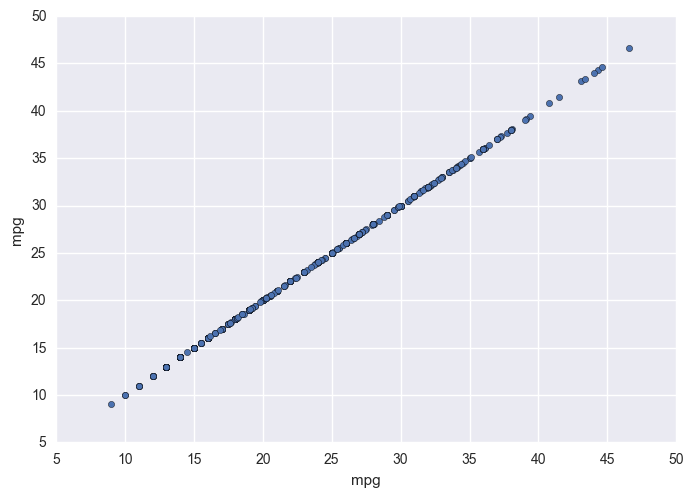

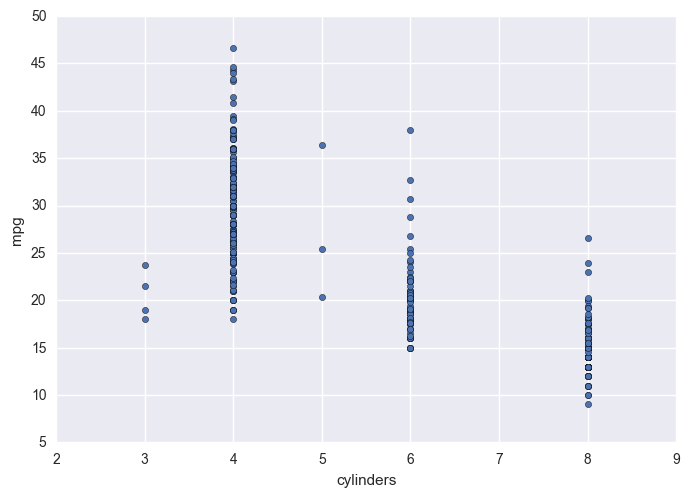

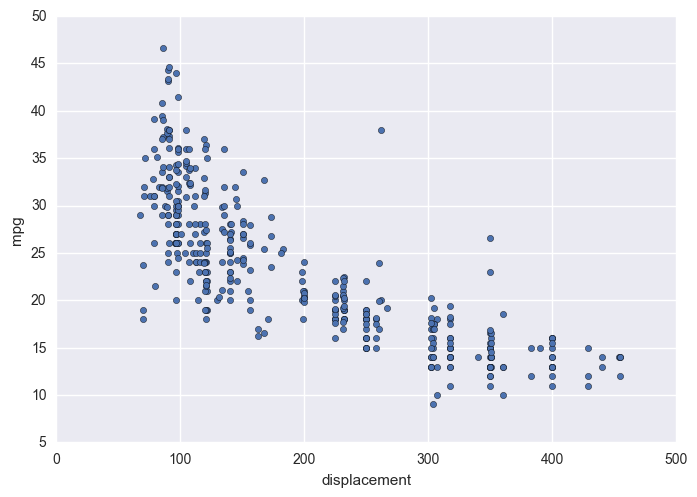

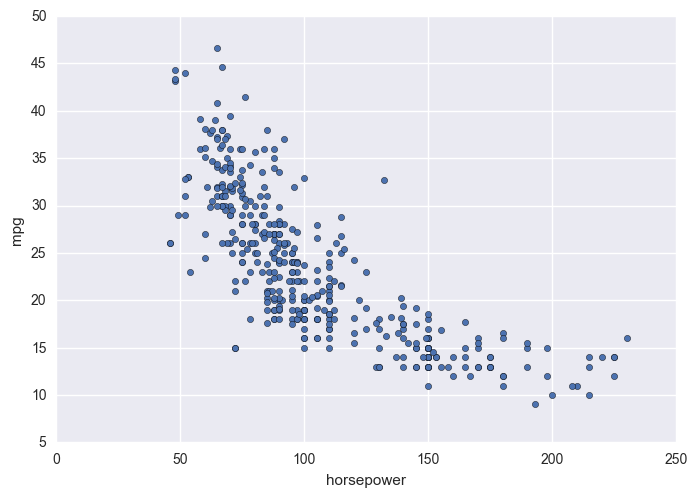

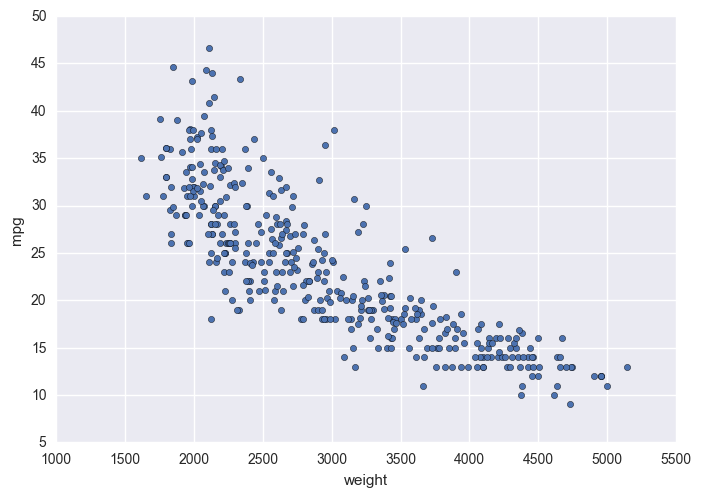

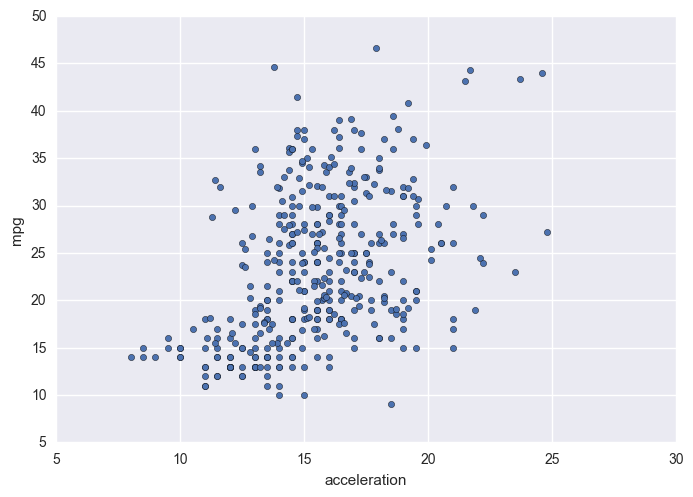

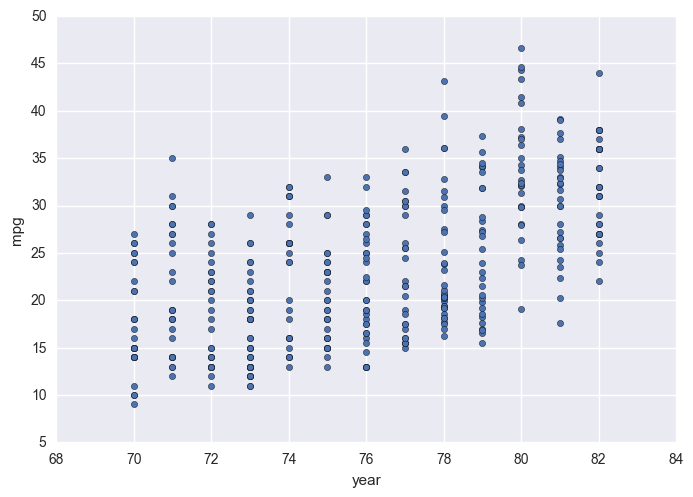

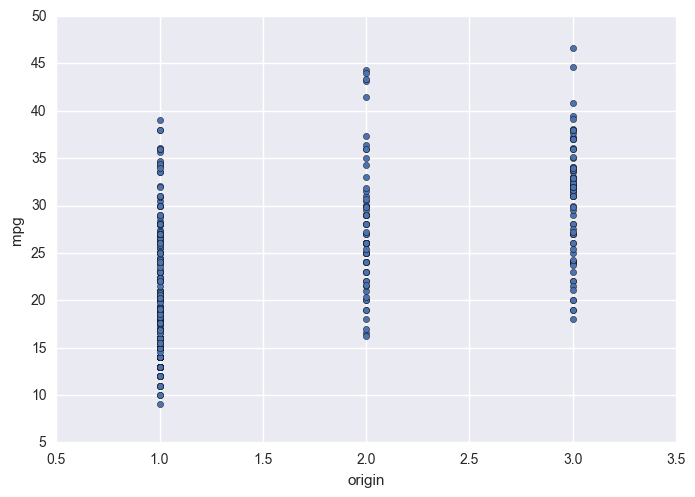

In [10]:
# scatter plots with matplotlib
for col in df.columns:
    if col not in ['name']:
        df.plot.scatter(x=col, y='mpg')


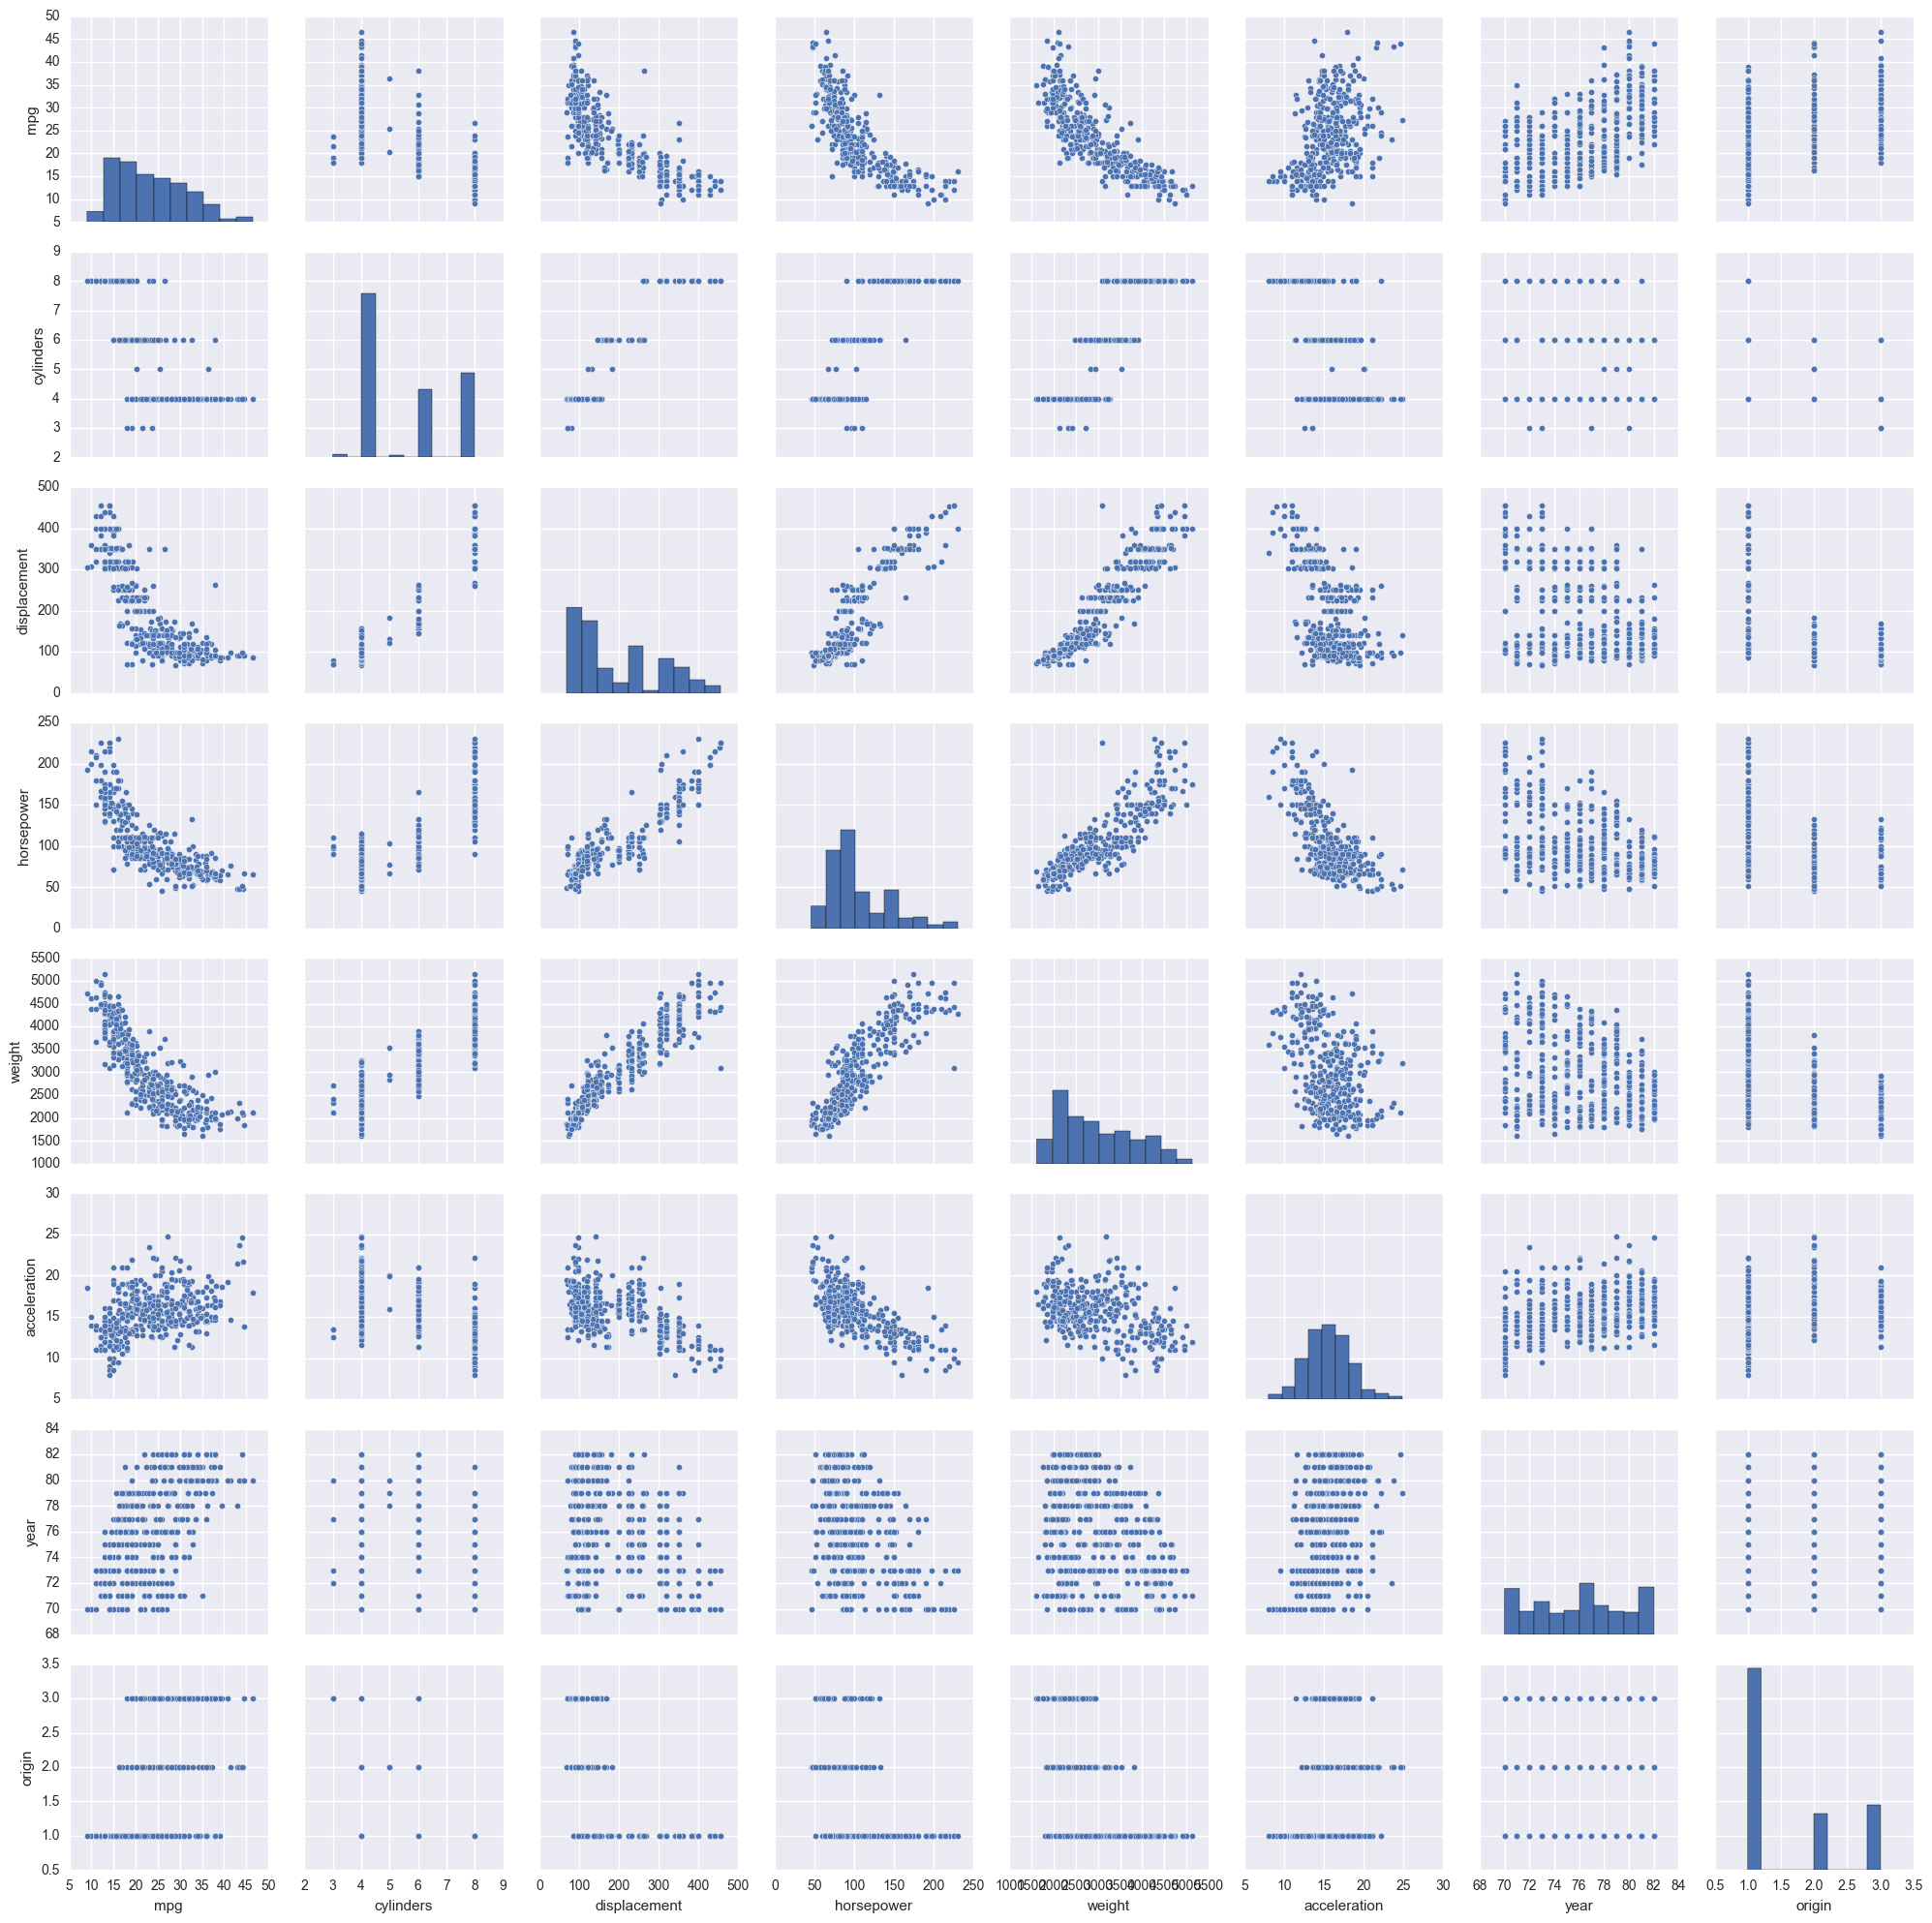

In [11]:
# pair plots with seaborn
sns.pairplot(df)